# Character detection / OCR with EMNIST demo


In [1]:
import matplotlib.pyplot as plt
import cv2
import os

from nets import LeNet_NClasses_batchnorm
import train
from segment import *

Load sample images
---

In [2]:
images = {
    "digits" : cv2.cvtColor(cv2.imread("./raw_images/digits.jpg"),cv2.COLOR_BGR2RGB),
    "capsletters": cv2.cvtColor(cv2.imread("./raw_images/latin_caps.jpg"),cv2.COLOR_BGR2RGB),
    "greek"  : cv2.cvtColor(cv2.imread("./raw_images/greek_lower.jpg"),cv2.COLOR_BGR2RGB),
    "nonalphanum" : cv2.cvtColor(cv2.imread("./raw_images/nonalphanum.jpg"),cv2.COLOR_BGR2RGB),
    "pangram" : cv2.cvtColor(cv2.imread("./raw_images/pangram.jpg"),cv2.COLOR_BGR2RGB)
}

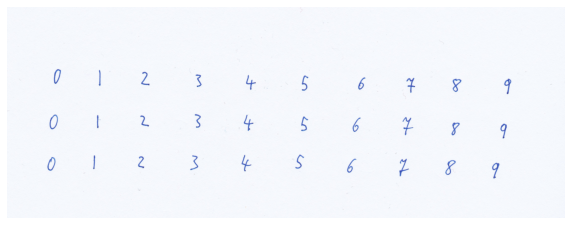

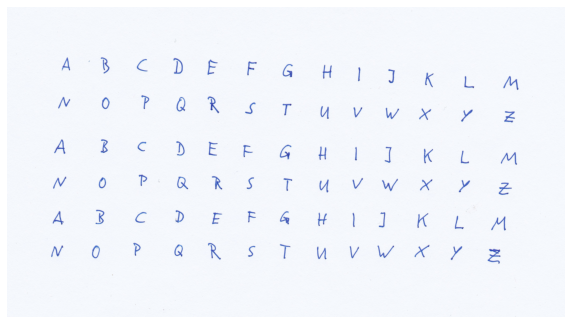

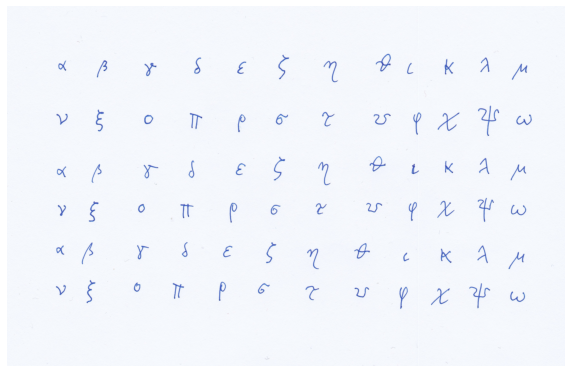

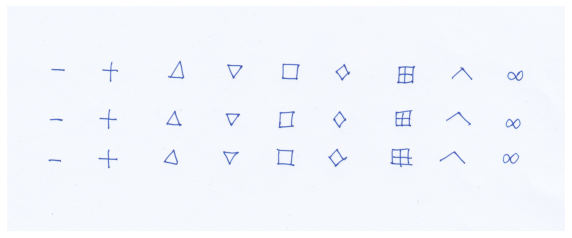

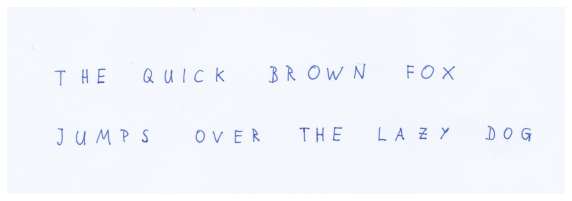

In [3]:
for img in images.values():
    plt.figure(figsize=(10,10))    
    plt.imshow(img)
    plt.axis("off")

Load/train model
---

In [4]:
LENET_CAPS_PATH = "./lenet_caps_parameters.pth"   

if not os.path.exists(LENET_CAPS_PATH):
    train.train_caps(LENET_CAPS_PATH)
    
cnn_caps = LeNet_NClasses_batchnorm(26)
cnn_caps.load_state_dict(torch.load(LENET_CAPS_PATH))
cnn_caps = cnn_caps.eval()

LeNet for upper case letters
loading data ... done
learning rate = 0.1
epoch 1/20 ... training loss = 0.103831805
epoch 2/20 ... training loss = 0.10347306
epoch 3/20 ... training loss = 0.059459373
epoch 4/20 ... training loss = 0.051839776
epoch 5/20 ... training loss = 0.18527476
epoch 6/20 ... training loss = 0.05320276
epoch 7/20 ... training loss = 0.039171703
epoch 8/20 ... training loss = 0.041681375
epoch 9/20 ... training loss = 0.03429019
epoch 10/20 ... training loss = 0.03570635
epoch 11/20 ... training loss = 0.029831145
epoch 12/20 ... training loss = 0.04208643
epoch 13/20 ... training loss = 0.030378815
epoch 14/20 ... training loss = 0.02777534
epoch 15/20 ... training loss = 0.031629924
epoch 16/20 ... training loss = 0.034850184
epoch 17/20 ... training loss = 0.023571957
epoch 18/20 ... training loss = 0.019805253
epoch 19/20 ... training loss = 0.037232343
epoch 20/20 ... training loss = 0.01895339
evaluating...
training accuracy: 0.9946125594047355
test accuracy:

# Letter detection

The classifier has been trained on the upper case letters of the **By_Class** split of the EMNIST dataset.
The softmax probabilites are thresholded at 0.9 to avoid the detection of characters that are not upper case latin letters. This works to some extent.

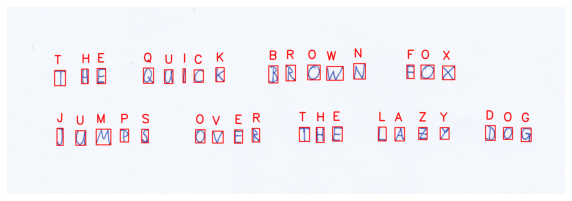

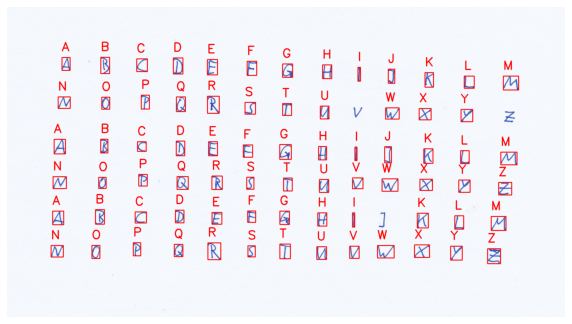

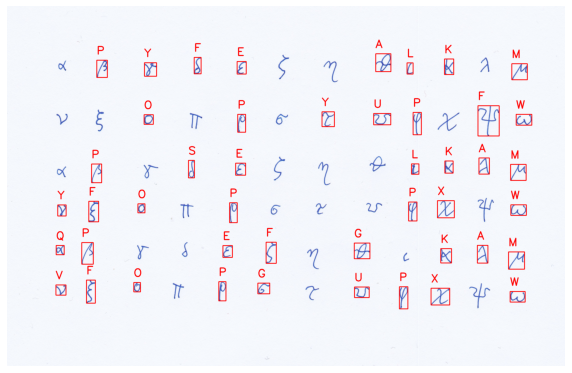

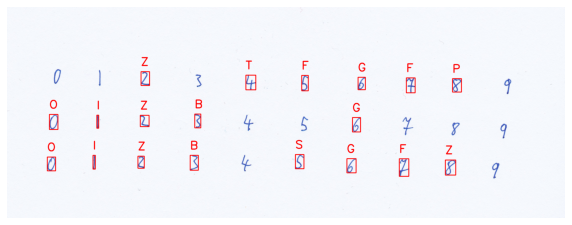

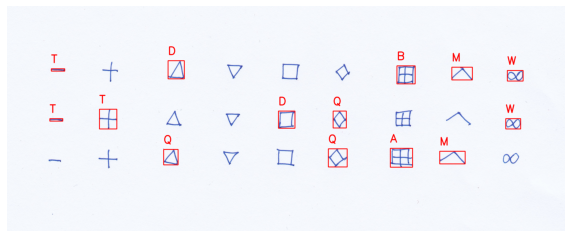

In [7]:
caps_labels = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"


plt.figure(figsize=(10,10))
plt.imshow(detectandlabel(cnn_caps,images["pangram"],caps_labels,thresh=0.9))
plt.axis("off")
plt.savefig("pangram_demo.jpg",bbox_inches='tight')

for key in ["capsletters","greek","digits","nonalphanum"]:
    plt.figure(figsize=(10,10))
    plt.imshow(detectandlabel(cnn_caps,images[key],caps_labels,thresh=0.9))
    plt.axis("off")

# Demo of the image segmentation pipeline

ROI detection
---

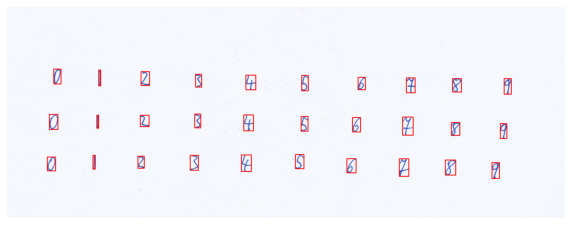

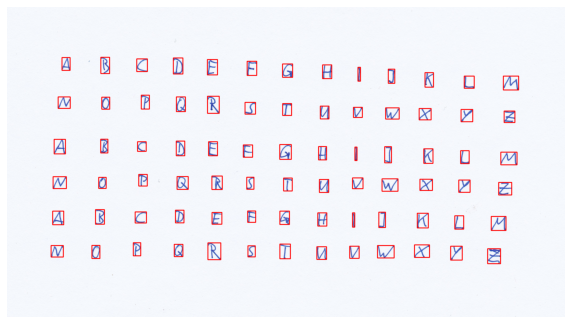

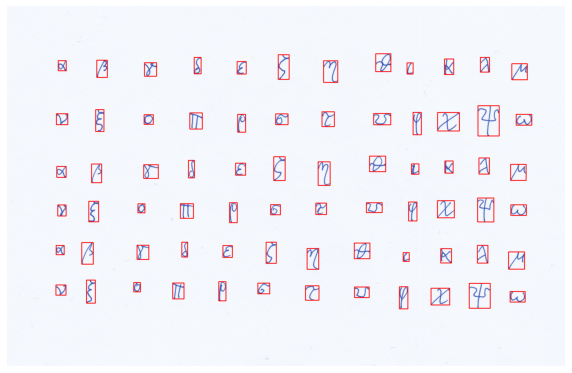

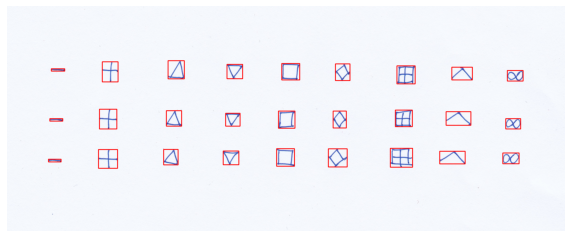

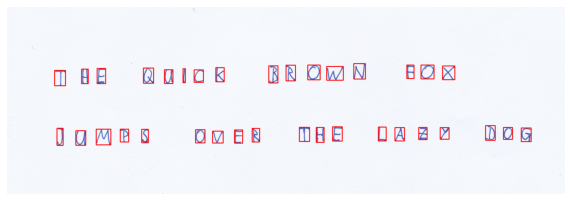

In [8]:
for img in images.values():
    plt.figure(figsize=(10,10))    
    plt.imshow(detectanddrawbb(img))
    plt.axis("off")

Wrangling of ROIs into 28x28 grayscale images
---

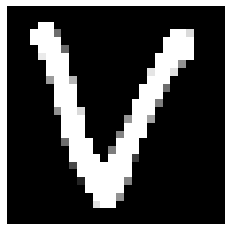

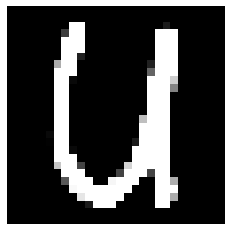

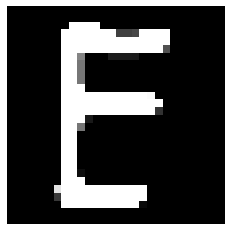

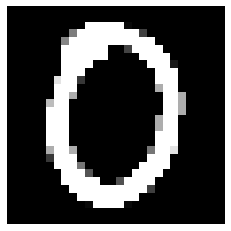

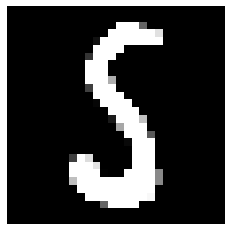

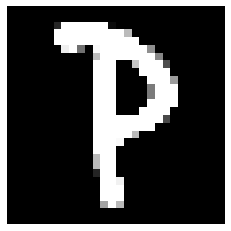

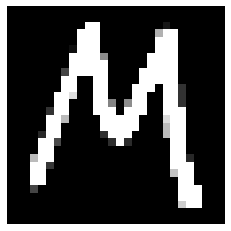

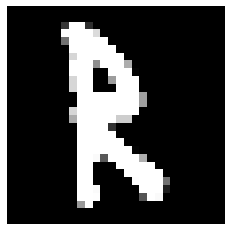

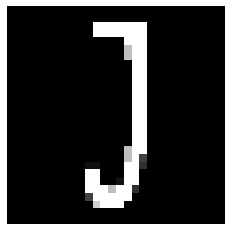

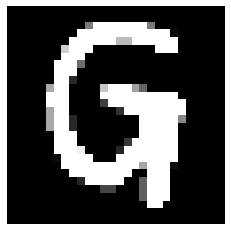

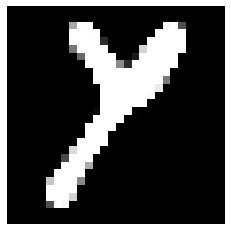

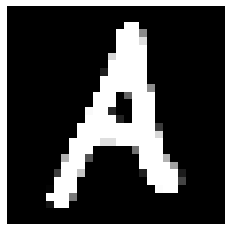

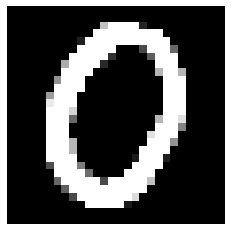

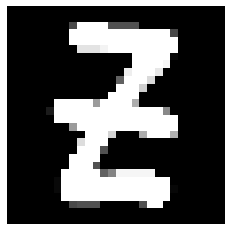

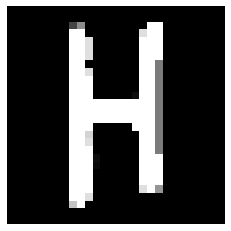

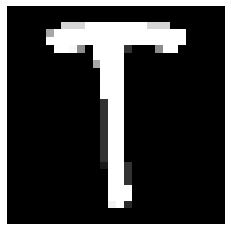

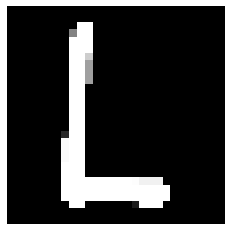

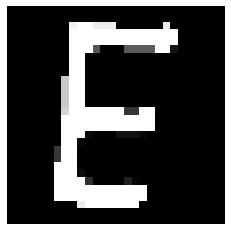

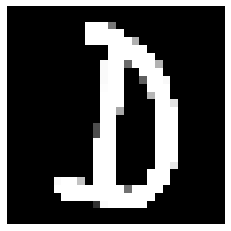

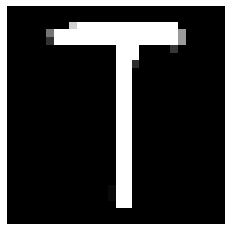

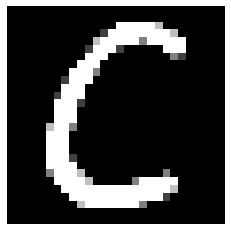

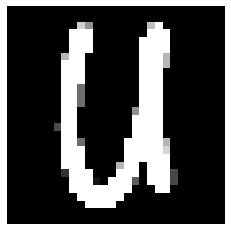

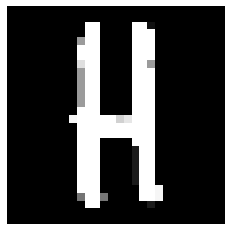

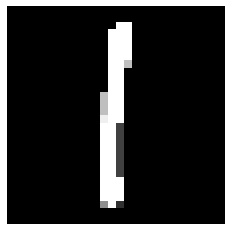

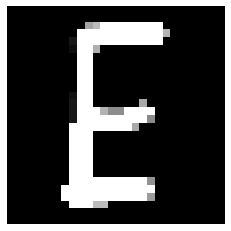

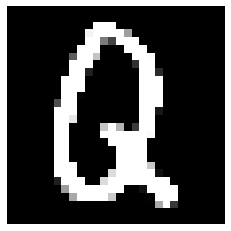

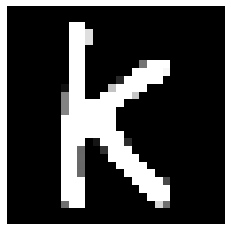

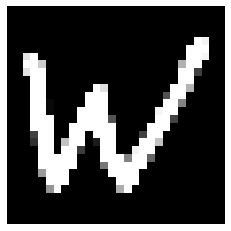

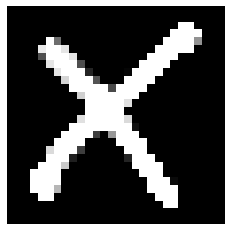

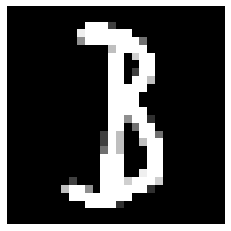

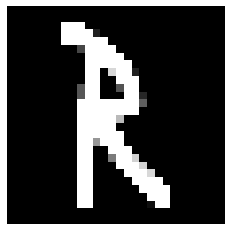

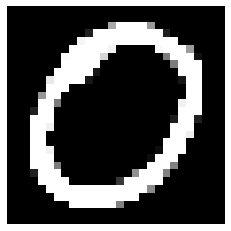

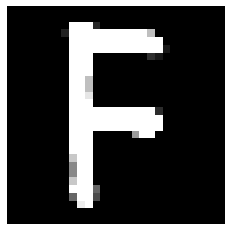

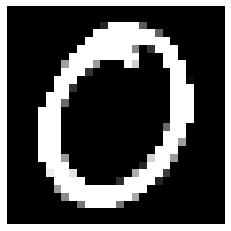

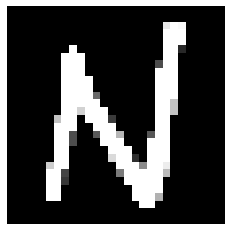

In [9]:
for _,subimg in segment_characters(binarize(images["pangram"])):
    plt.imshow(subimg,cmap="gray")
    plt.axis("off")
    plt.show()